In [13]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import constants
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
df['Weight'] = np.around(df['Weight'] * constants.pound, 1)
df['Height'] = np.around(df['Height'] * constants.inch * 100)
df['Height'] = df['Height'].astype(np.int64, errors='ignore')
df.head()
df['Gender'].value_counts()


Male      5000
Female    5000
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Height', ylabel='Weight'>

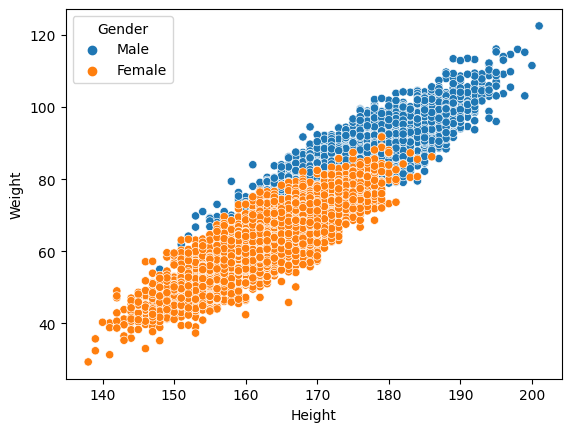

In [15]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender')

In [16]:
df.Gender = df.Gender.map({'Male': 0, 'Female': 1})
df.sample(n=10)

,Gender,Height,Weight
2977,0,168,81.9
692,0,175,78.0
7906,1,170,60.4
9985,1,173,77.3
8836,1,165,64.6
915,0,188,99.1
3596,0,188,102.0
1910,0,170,74.9
828,0,169,72.6
9708,1,147,41.8


In [17]:
X = df[['Gender', 'Height']]
y = df[['Weight']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.8998585419278751

In [32]:

# np.round(lin_reg.predict([[0,180]])[0][0], 2)

d:\Developments\python-react-machine-learning\backend\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.84

In [20]:
joblib_file = './models/WeightPredictionLinRegModel.joblib'
joblib.dump(lin_reg, joblib_file)

['./models/WeightPredictionLinRegModel.joblib']